# PCA

### EDA

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings 
warnings.simplefilter('ignore')

In [3]:
df= pd.read_csv("wine.csv")
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

array([[<Axes: title={'center': 'Type'}>,
        <Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Malic'}>,
        <Axes: title={'center': 'Ash'}>],
       [<Axes: title={'center': 'Alcalinity'}>,
        <Axes: title={'center': 'Magnesium'}>,
        <Axes: title={'center': 'Phenols'}>,
        <Axes: title={'center': 'Flavanoids'}>],
       [<Axes: title={'center': 'Nonflavanoids'}>,
        <Axes: title={'center': 'Proanthocyanins'}>,
        <Axes: title={'center': 'Color'}>,
        <Axes: title={'center': 'Hue'}>],
       [<Axes: title={'center': 'Dilution'}>,
        <Axes: title={'center': 'Proline'}>, <Axes: >, <Axes: >]],
      dtype=object)

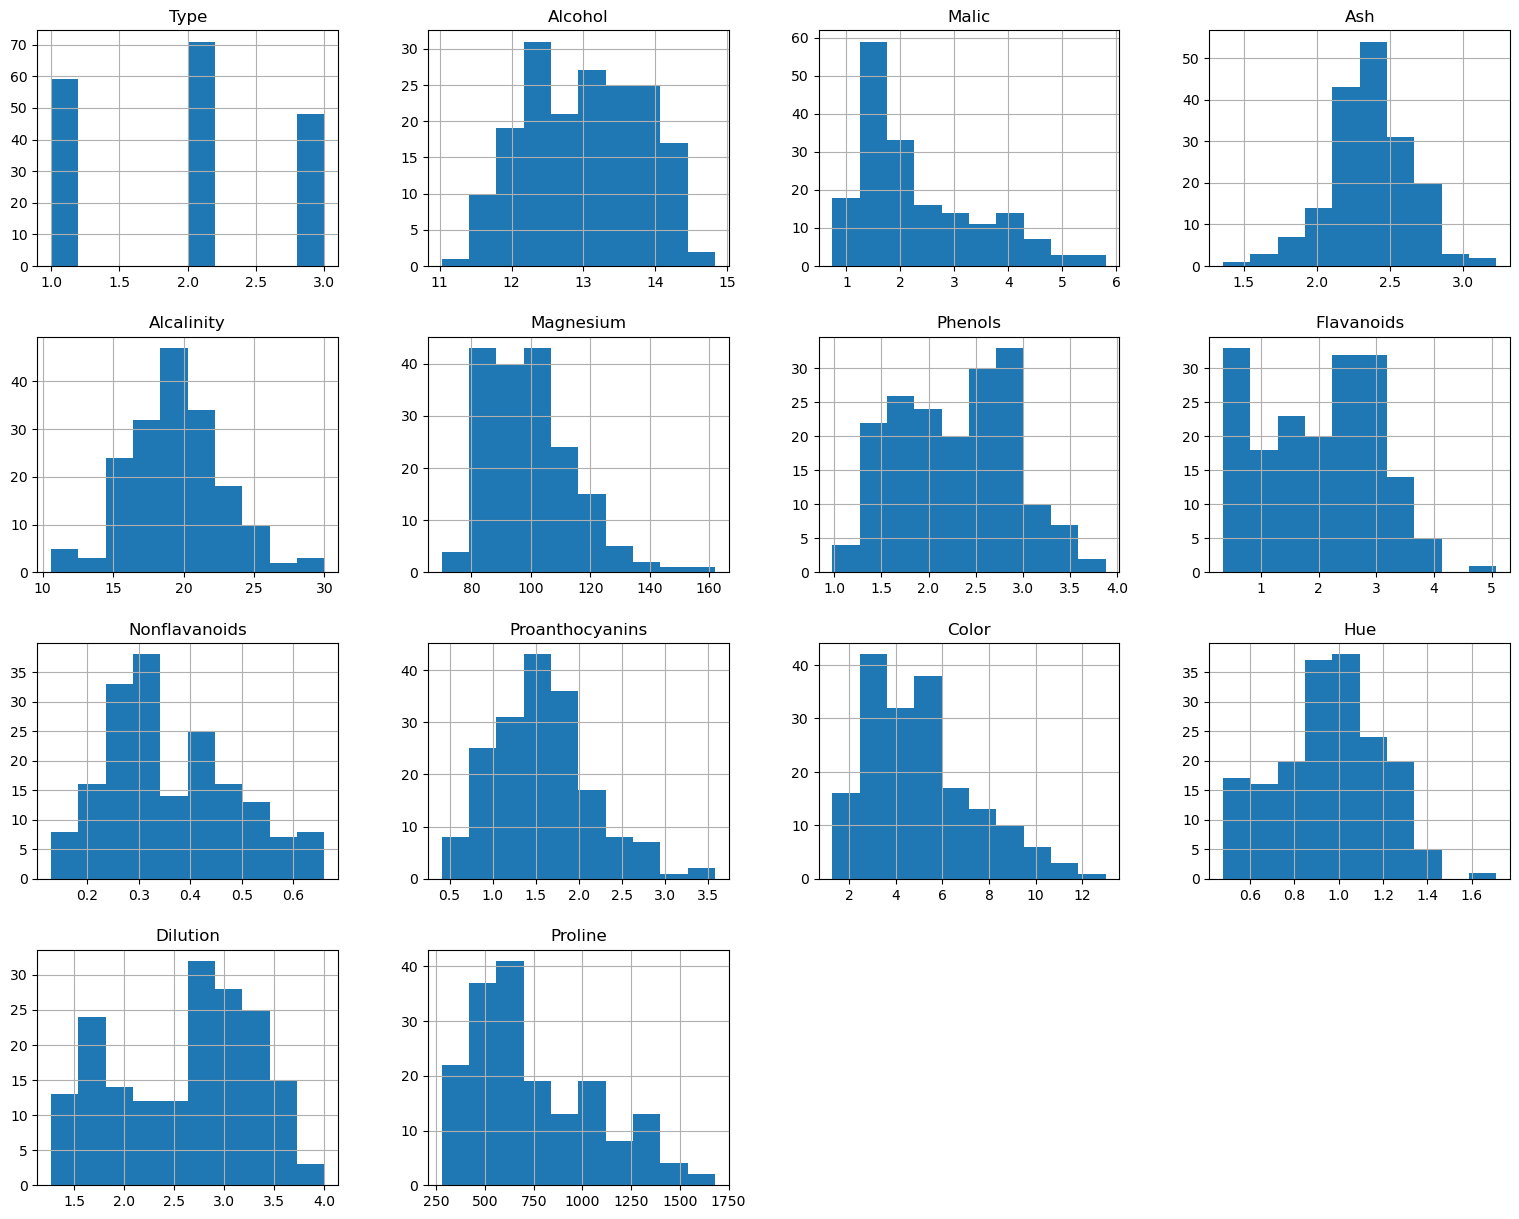

In [15]:
df.hist(figsize=(19,15))

<Axes: >

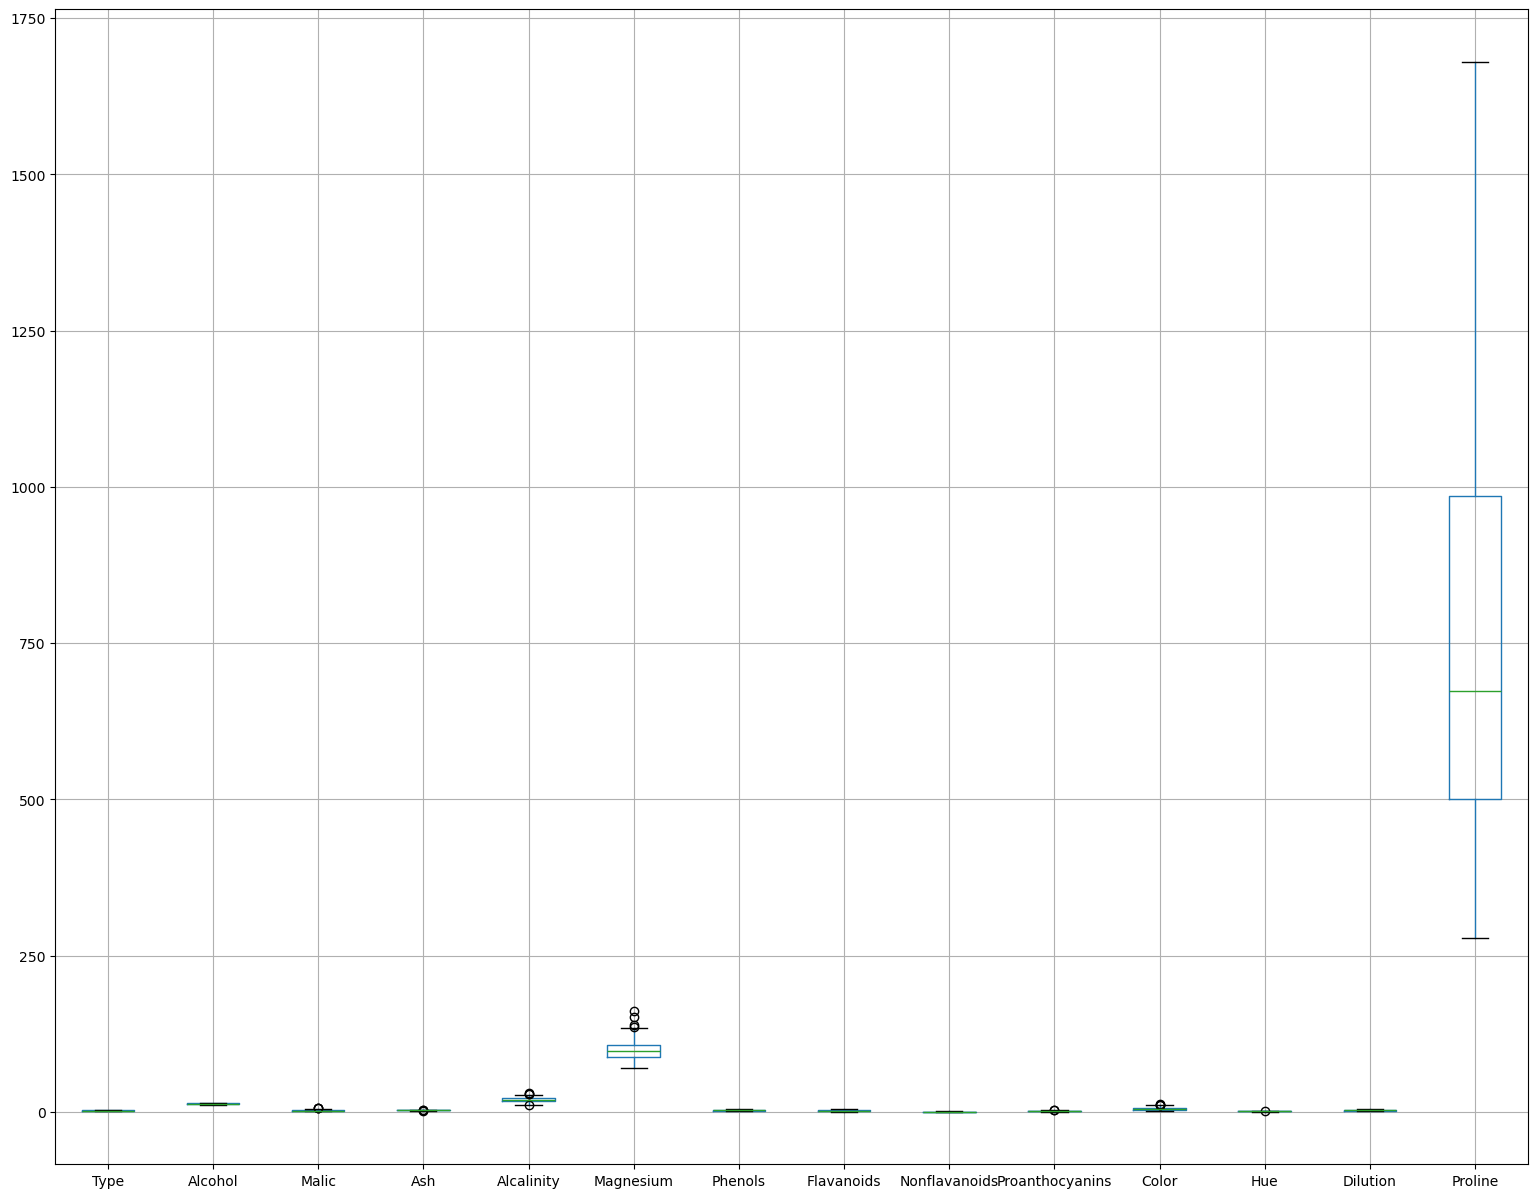

In [14]:
df.boxplot(figsize=(19,15))

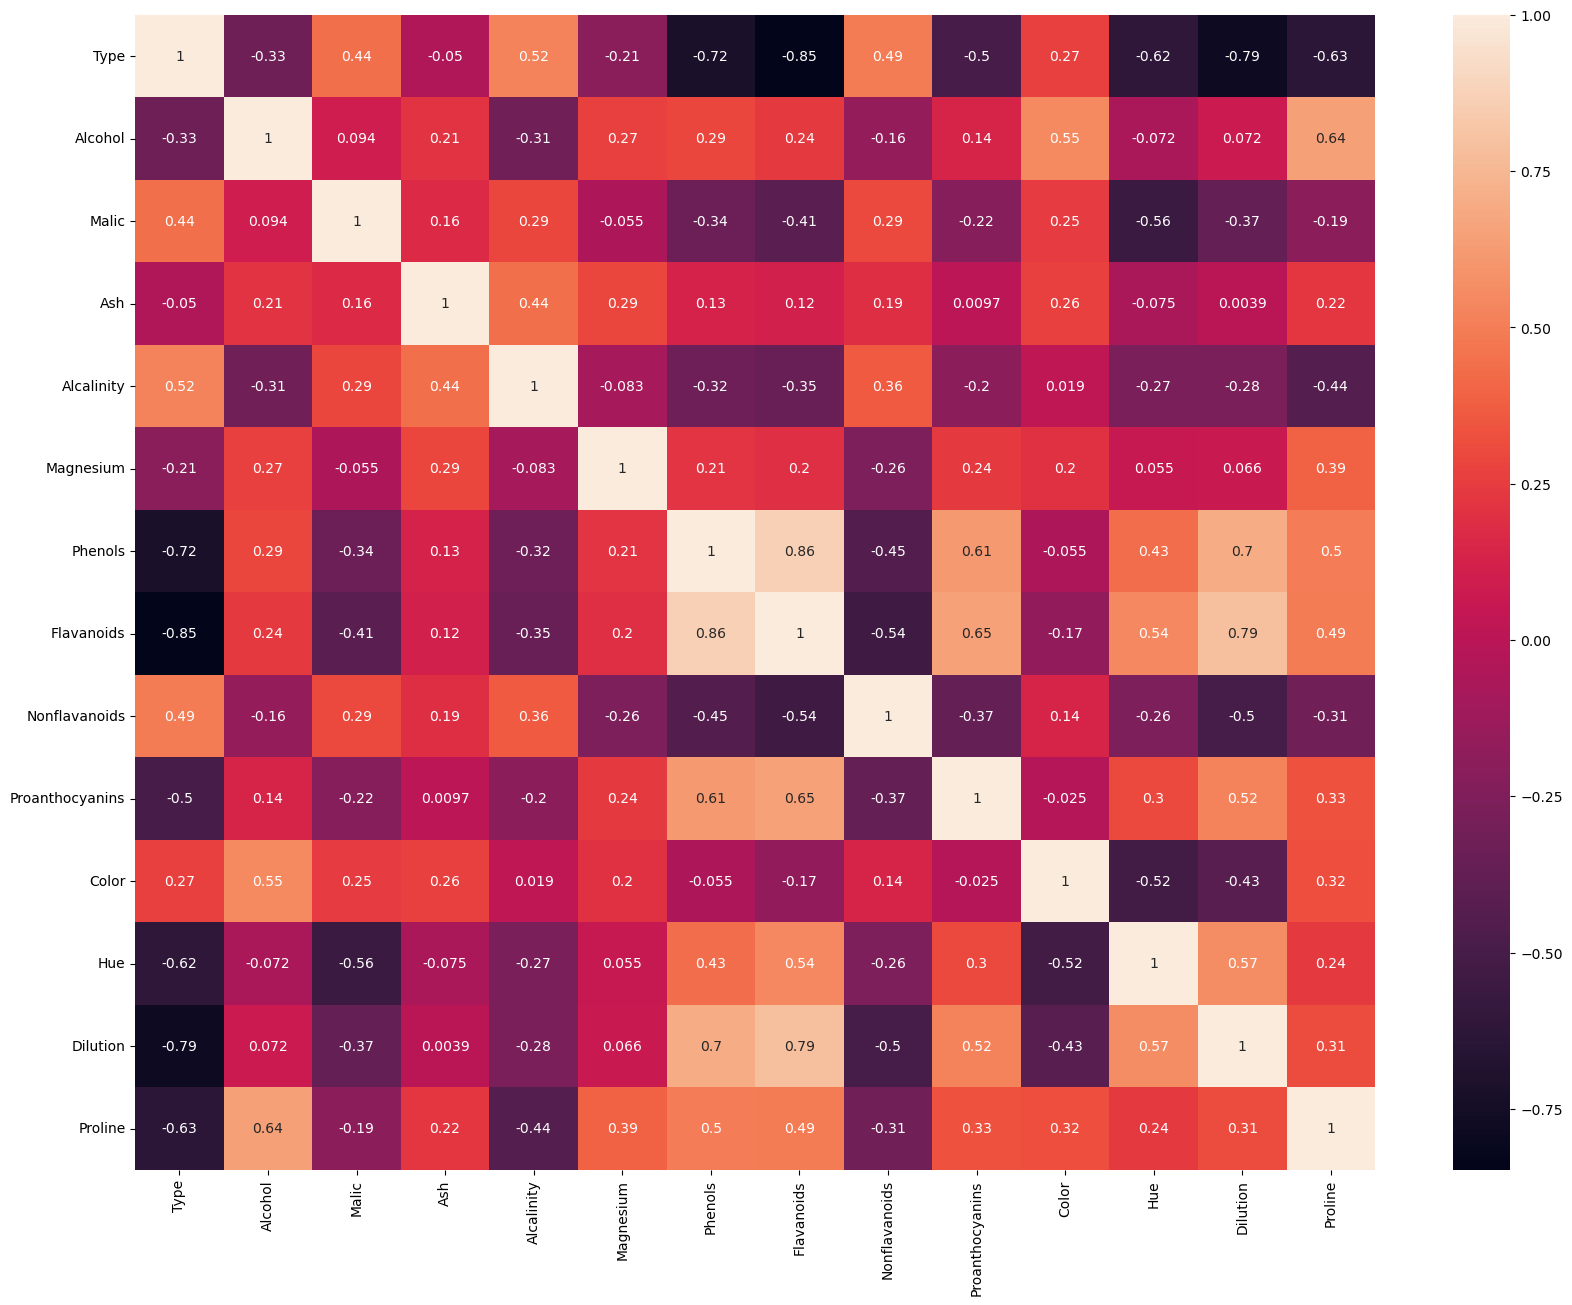

In [22]:
corr= df.corr()
plt.figure(figsize=(20,15))
hp=sns.heatmap(corr,annot=True)

### : Dimensionality Reduction with PCA

In [24]:
red=scale(df)
red

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [26]:
pca= PCA(n_components=2)
pca_value=pca.fit_transform(red)
pca_value

array([[-3.5229339 ,  1.45309844],
       [-2.52885806, -0.33001925],
       [-2.78502898,  1.03693595],
       [-3.92258841,  2.76821026],
       [-1.40751111,  0.86777309],
       [-3.28812981,  2.13017513],
       [-2.75057754,  1.17916999],
       [-2.39286652,  1.61128232],
       [-2.79525633,  0.92317952],
       [-3.00559666,  0.79628417],
       [-3.67868855,  1.31252342],
       [-2.10963477,  0.61298199],
       [-2.43845636,  0.67852331],
       [-3.67349453,  1.14012136],
       [-4.44157575,  2.11031917],
       [-2.60892387,  1.66641801],
       [-2.47542846,  2.33089672],
       [-2.22623243,  1.63359016],
       [-3.74226929,  2.52840527],
       [-2.3944115 ,  1.06452946],
       [-3.33656895,  0.79601279],
       [-1.48140399,  0.24008547],
       [-2.82806867, -0.08685755],
       [-2.00771405, -0.51561649],
       [-2.11463604, -0.31592057],
       [-1.39753751,  0.93821529],
       [-2.13348803,  0.68710205],
       [-1.62970383, -0.09118403],
       [-2.50760753,

In [27]:
variance = pca.explained_variance_ratio_
variance

array([0.39542486, 0.17836259])

In [28]:
varaince_1= np.cumsum(np.round(variance,4)*100)
varaince_1

array([39.54, 57.38])

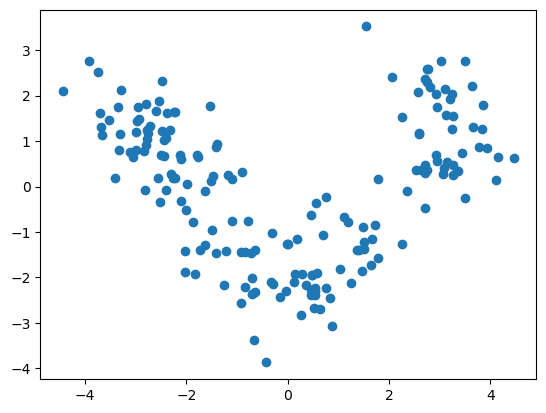

In [29]:
x=pca_value[:,0]
y=pca_value[:,1]
plt.scatter(x,y)

In [49]:
sum_of_squares=[]
for x in range (1,15):
    k_means=KMeans(n_clusters=x).fit(red)
    sum_of_squares.append(k_means.inertia_)

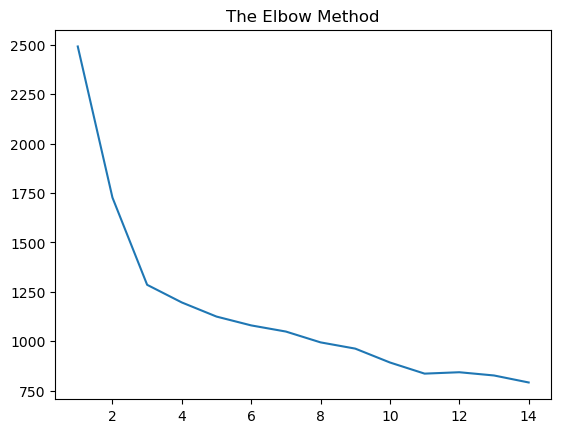

In [50]:
plt.plot(range(1,15),sum_of_squares)
plt.title('The Elbow Method')
plt.show()

In [35]:

k_clustering=KMeans(n_clusters=5)
k_clustering.fit(red)

KMeans(n_clusters=5)

In [36]:
labeling= k_clustering.predict(red)
labeling

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 2, 4, 2,
       2, 4, 4, 2, 4, 2, 4, 2, 2, 4, 4, 4, 2, 2, 4, 2, 4, 0, 2, 4, 4, 4,
       4, 4, 4, 4, 4, 2, 2, 2, 3, 4, 2, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2,
       2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 4, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 3, 3, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3,
       3, 0])

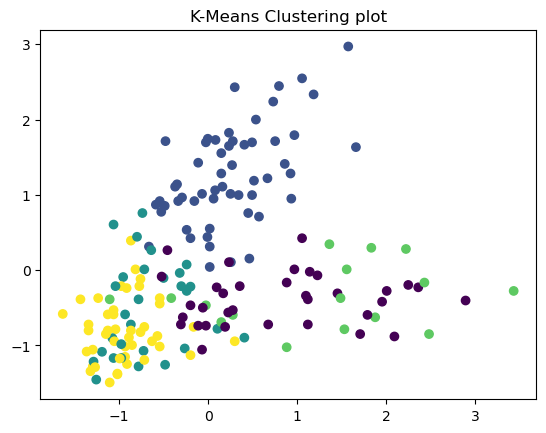

In [41]:
plt.scatter(red[:,10],red[:,13],c=labeling)
plt.title('K-Means Clustering plot')
plt.show()

In [44]:
kmeans_score = silhouette_score(red,labeling)
kmeans_score

0.22279260922853641

### Clustering with PCA

In [53]:
sum_of_squares=[]
for x in range (1,15):
    k_means=KMeans(n_clusters=x).fit(pca_value)
    sum_of_squares.append(k_means.inertia_)

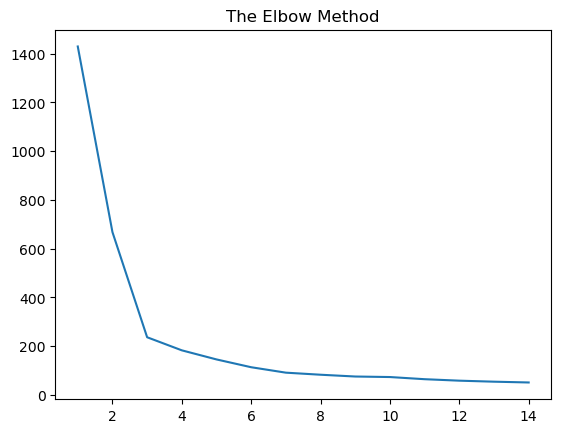

In [58]:
plt.plot(range(1,15),sum_of_squares)
plt.title('The Elbow Method')
plt.show()

In [55]:
k_clustering_0=KMeans(n_clusters=5)
k_clustering_0.fit(pca_value)

KMeans(n_clusters=5)

In [57]:
labeling_0=k_clustering_0.predict(pca_value)
labeling_0

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 0, 3, 0,
       0, 3, 3, 0, 3, 0, 3, 2, 0, 3, 0, 3, 0, 0, 0, 0, 3, 4, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 0, 0, 2, 3, 0, 0, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0,
       0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 2, 3, 3, 0, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1,
       4, 1, 1, 4, 1, 1, 4, 4, 4, 4, 1, 4, 1, 4, 1, 1, 4, 4, 1, 1, 1, 1,
       1, 1])

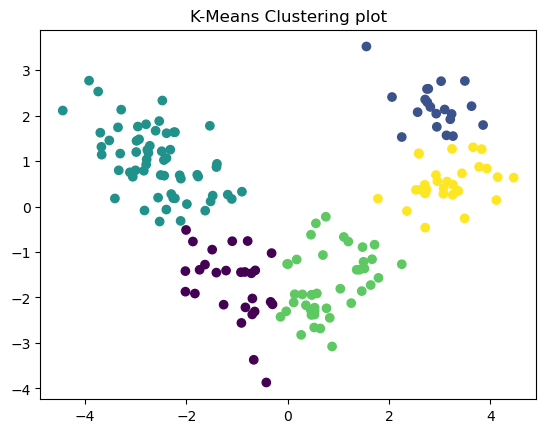

In [59]:

plt.scatter(pca_value[:,0],pca_value[:,1],c=labeling_0)
plt.title('K-Means Clustering plot')
plt.show()

In [61]:
kmeans_score_0 = silhouette_score(pca_value, labeling_0)
kmeans_score_0

0.48307863397903616

### Comparisom & Analysis

In [63]:
comparing_of_clusters=pd.DataFrame({
    'Original values':kmeans_score,
    'PCA Values':kmeans_score_0
},index=(0,))
comparing_of_clusters

,Original values,PCA Values
0,0.222793,0.483079


PCA can be a valuable preprocessing step for clustering.
By reducing the dimensionality of the data, PCA can simplify the clustering process, which leads to faster algorithms and improved interpretability of the results.
and also by removing noise and focusing on the most important features, PCA can enhance the quality of the resulting clusters.

### Conclusion

### Conclusion and Insights:

This is an exploration of the dataset, including exploratory data analysis (EDA), dimensionality reduction through Principal Component Analysis (PCA), and the application of K-means clustering. The study compared the clustering outcomes obtained from both the original data and the PCA-transformed data, effectively demonstrating the impact of dimensionality reduction on the clustering performance

### Implications and Recommendations:

PCA and K-means clustering are valuable tools for  data analysis which offers valuable information for underlying patterns and structures within datasets. When working with high-dimensional data, PCA proves particularly beneficial by facilitating dimensionality reduction while preserving crucial information. However, careful consideration must be given to the selection of the optimal number of principal components to achieve a balance between effective dimensionality reduction and information retention. Subsequently, K-means clustering can be effectively applied to the reduced-dimensional data to identify meaningful clusters.

The ultimate decision regarding whether to employ PCA prior to clustering or to directly apply clustering on the original dataset will depend on a confluence of factors, including the specific objectives of the analysis, the available computational resources, and the inherent complexity of the dataset.